#  Modeling count data using a binomial observation model

In [1]:
require(lgpr)
require(repr)
require(ggplot2)

Loading required package: lgpr
This is lgpr, version 0.30.4.
Loading required package: repr
Loading required package: ggplot2


## 1. Simulating data
In this example we generate count data with 10 individuals and 8 measurement time points for each. 

[1] 0.004039288
 [1]  1  4  7  6  3  0  0  7  1  5  9 10 10 10  7  2  2  4  9  9  9 10  8  3  2
[26]  5  9  9 10 10  9  1  1  2 10 10 10  9  9  4  0  3  7  6  2  0  1  3  0  1
[51]  7  5  1  0  0  6  3  5  9 10  9  8 10  0  0  3  6  7  2  1  1  5  1  4  6
[76]  8  2  1  1  7


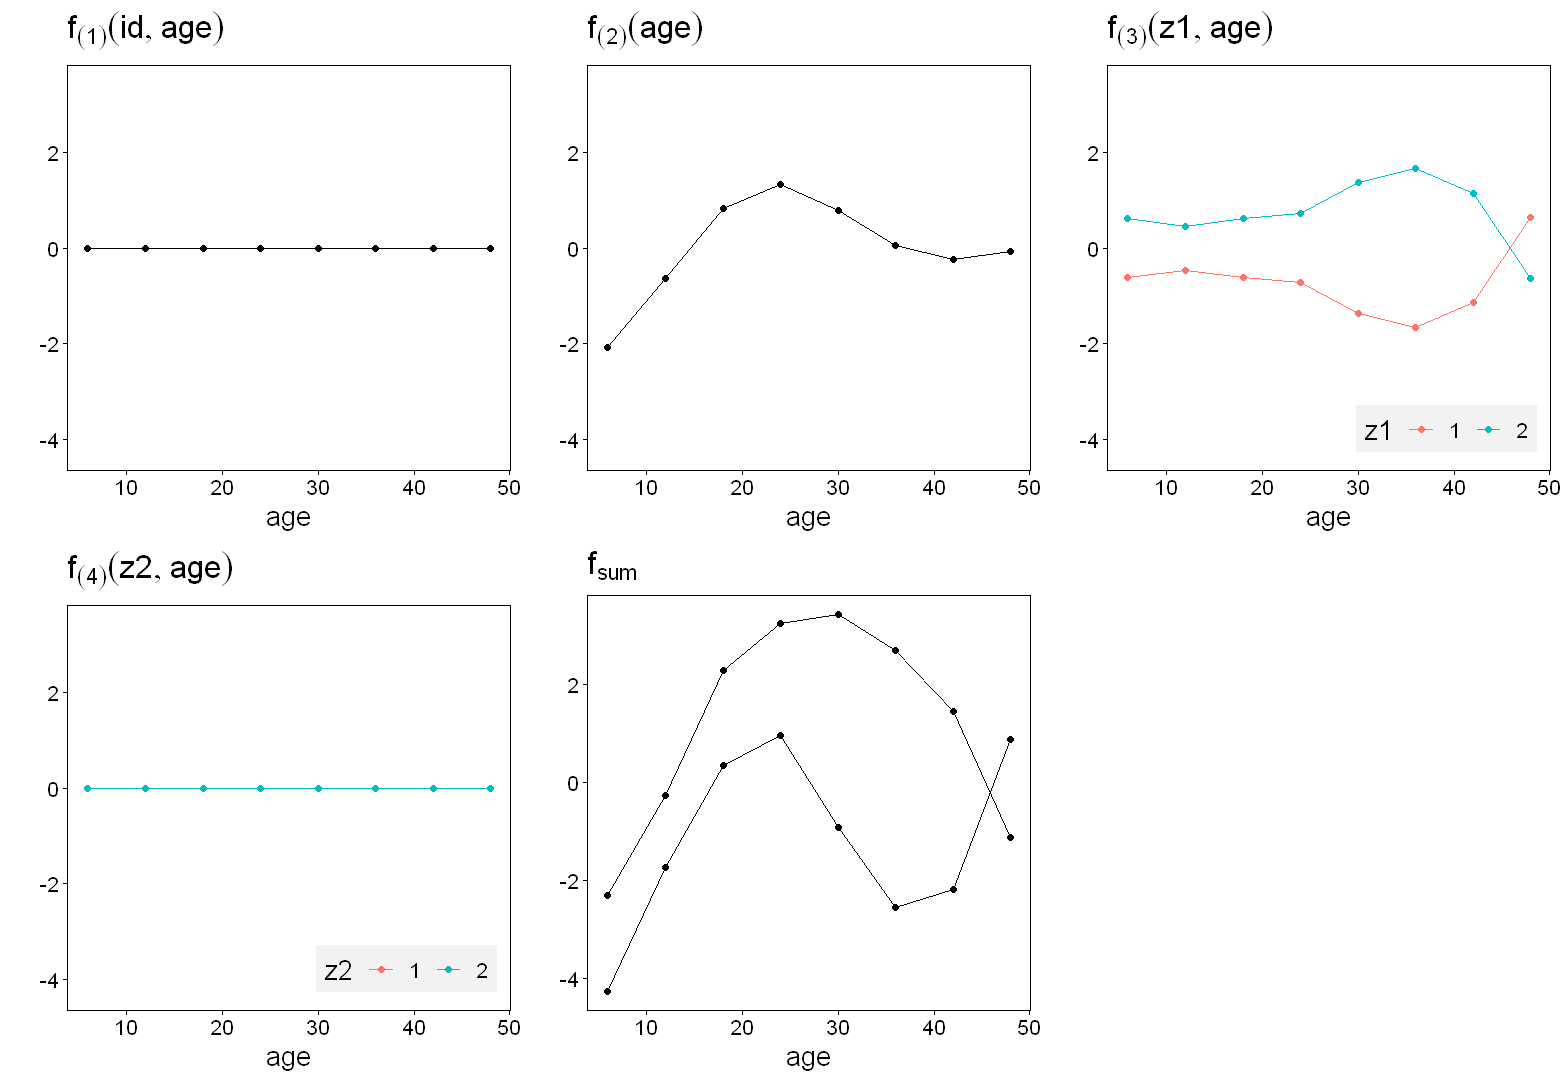

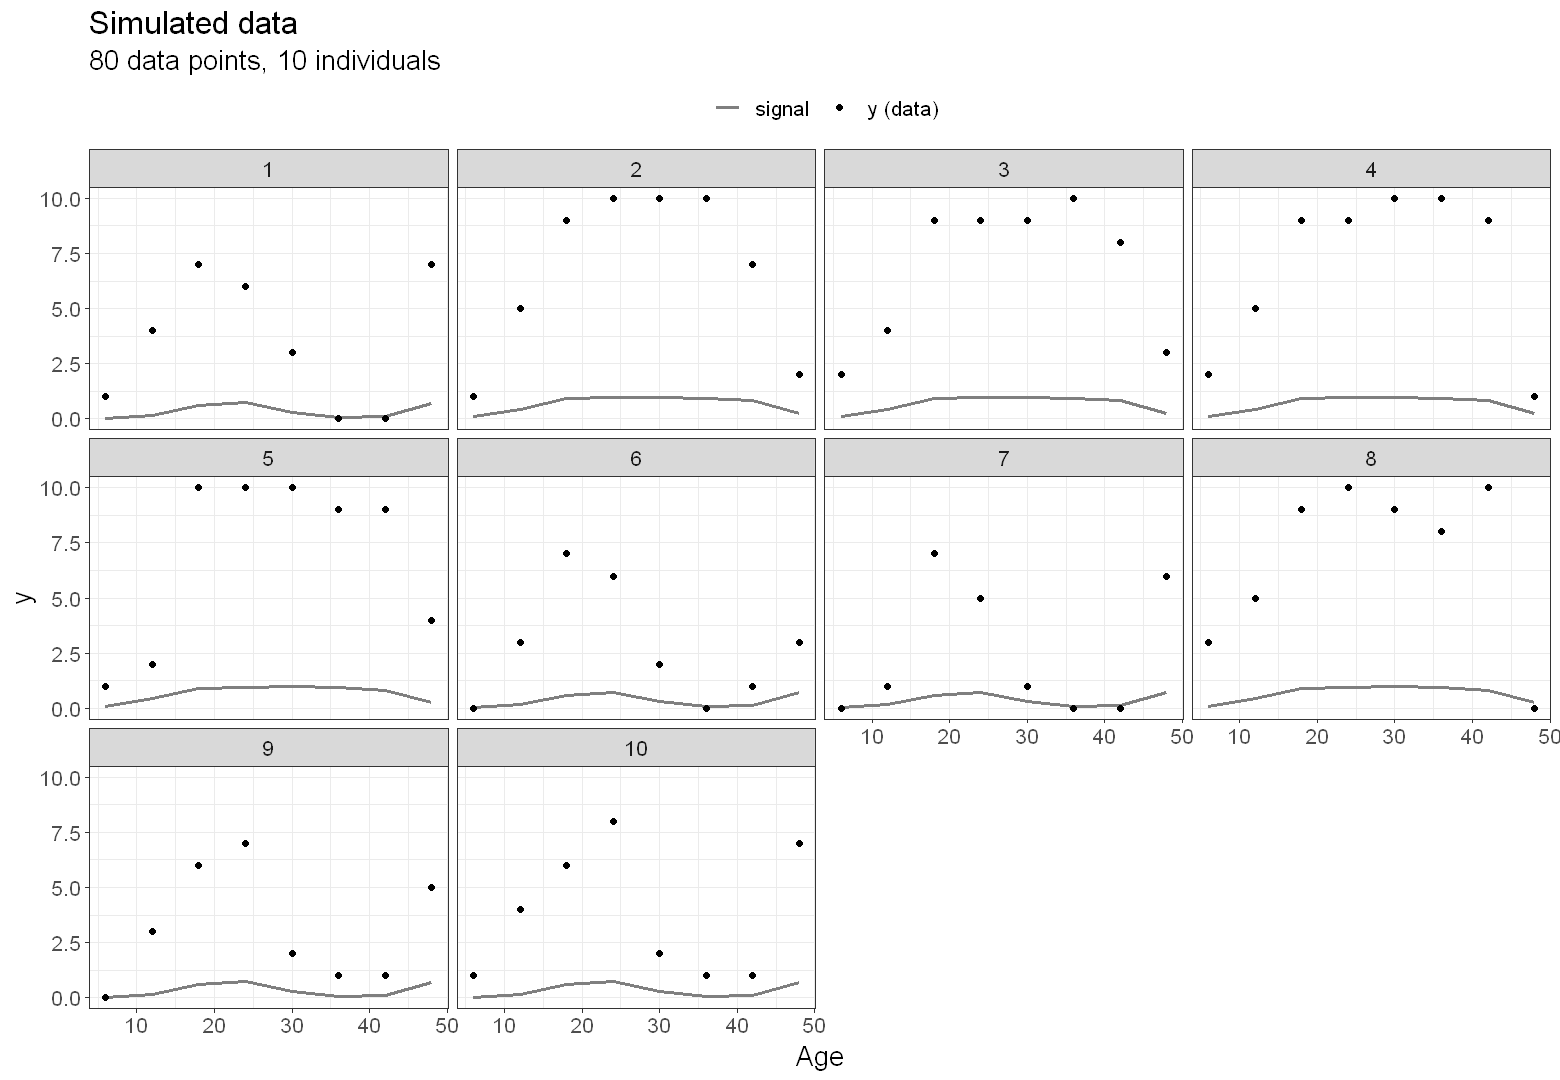

In [2]:
set.seed(1233)
simData   <- simulate_data(N          = 10,
                         t_data       = seq(6, 48, by = 6),
                         covariates   = c(     2,2),
                         lengthscales = c(6,12,6,6),
                         relevances   = c(0,1,1,0),
                         noise_type   = "binomial",
                         f_var        = 5,
                         N_trials     = 10)

p_signal <- simData$p_signal
print(p_signal)
print(simData$data$y)

options(repr.plot.width=13, repr.plot.height=9)
plot_components_simdata(simData, font_size = 16, time_is_xvar = TRUE)
plot_simdata(simData) + theme(text=element_text(size=16)) 

## 2. Fitting a model

In [3]:
fit <- lgp(formula  = y ~ id + age + z1 + z2,
          data     = simData$data,
          iter     = 1000,
          control  = list(adapt_delta = 0.9),
          refresh  = 0,
          likelihood = "binomial",
          N_trials = rep(10, times = 80),
          verbose  = TRUE,
          parallel = TRUE)

* Covariate 'z1' resolved to type 'categorical'.
* Covariate 'z2' resolved to type 'categorical'.

 ---------- LGPMODEL SUMMARY ----------

  Model:
    f = f[(1)](id, age) + f[(2)](age) + f[(3)](z1, age) + f[(4)](z2, age)
    Response variable: y
    Observation model: binomial 
  Variable types:
    - Identifier variable: id
    - Time variable: age
    - Other categorical variables: z1, z2
  Observation model: binomial

 ---------- PRIOR SPECIFICATIONS ----------

  alpha_id ~ Student-t(nu=20,mu=0,sigma=1)
  alpha_age ~ Student-t(nu=20,mu=0,sigma=1)
  alpha_categAge[1] ~ Student-t(nu=20,mu=0,sigma=1)
  alpha_categAge[2] ~ Student-t(nu=20,mu=0,sigma=1)

  ell_id ~ Log-Normal(0,1)
  ell_age ~ Log-Normal(0,1)
  ell_categAge[1] ~ Log-Normal(0,1)
  ell_categAge[2] ~ Log-Normal(0,1)


 
* Observation model = 4
* Number of data points = 80
* Number of model components = 4
* Number of individuals = 10
* Additional model info:
  - C_hat = -0.0150003
  - D = [1,1,0,0,2,0]
  - F_IS_SAMPLED = 1

Warning message:
"Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
http://mc-stan.org/misc/warnings.html#bulk-ess"

* Begin postprocessing. 
* Computing relevances over 2000 posterior samples.


 ---------- LGPFIT SUMMARY ----------

* Average runtime per chain: 417.42 s (warmup) and 206.63 s (sampling)
* Largest R-hat value is 1.0098 (ell_categAge[1])
* Used relevance method = f_mean
* Used selection threshold = 0.95

                Relevance Selected  Prob.
f[(1)](id, age)     0.006    FALSE 0.0035
f[(2)](age)         0.319     TRUE 1.0000
f[(3)](z1, age)     0.591     TRUE 1.0000
f[(4)](z2, age)     0.004    FALSE 0.0010
noise               0.081     TRUE 1.0000



## 3. Visualizing the results

We plot the posterior mean of the modeled signal $f$, which is the success probability parameter for binomial likelihood, for each MCMC sample. It is multiplied by `N_trials` to match the data scale.

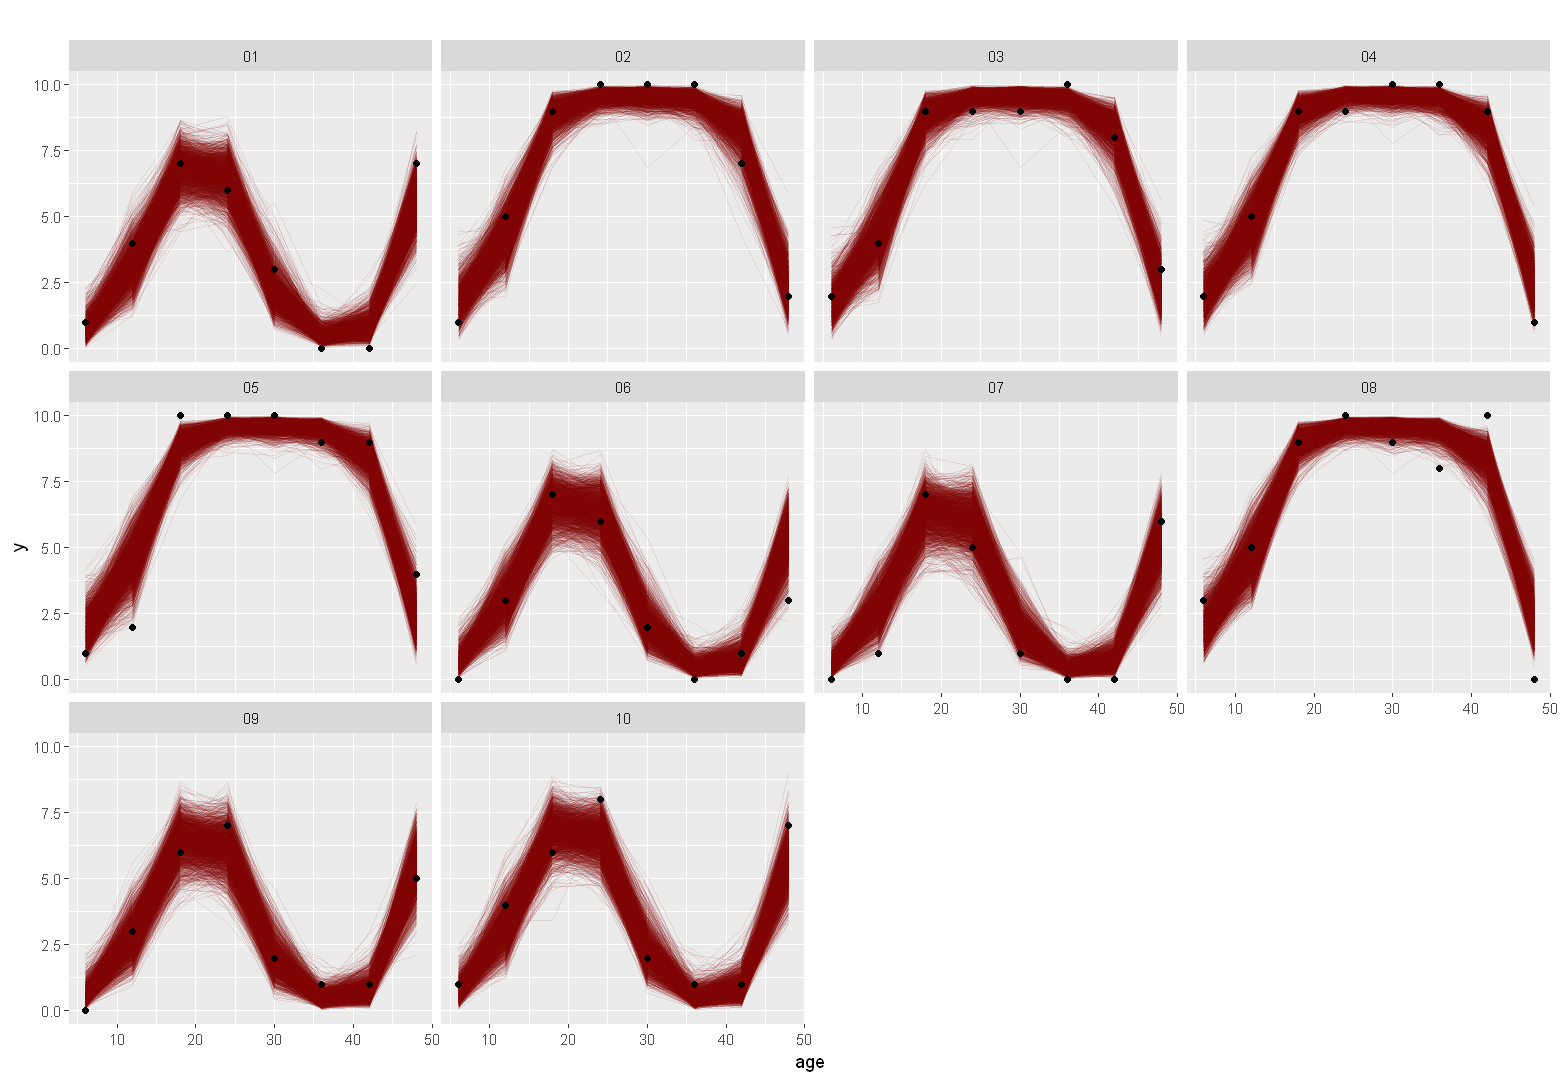

In [4]:
plot_posterior_f(fit)

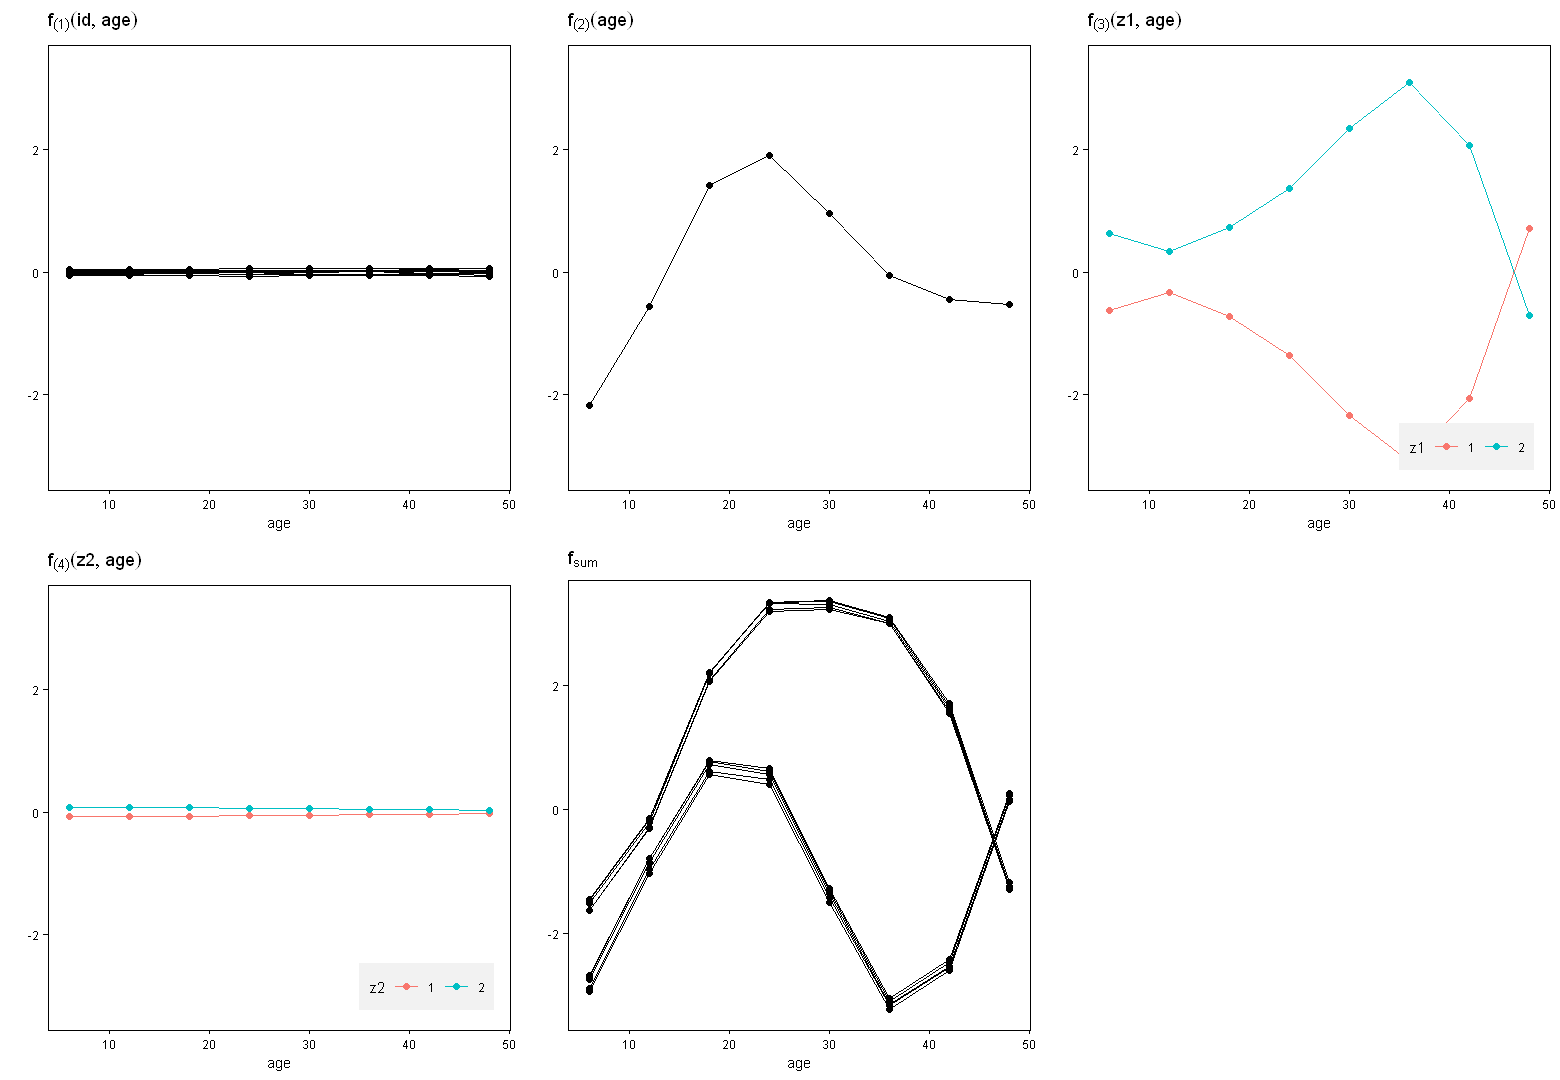

In [5]:
plot_components_posterior(fit)